In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

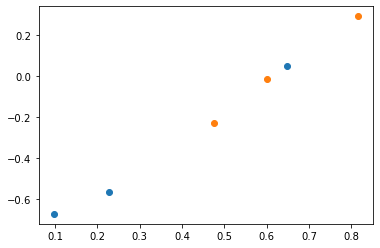

In [2]:
num_sample = 3
intercept = -0.7
sig_n = 0.2
slope = 1
x = np.random.rand(num_sample,1)
y = (x*slope) + intercept + sig_n*np.random.randn(num_sample,1)

x_t = np.random.rand(num_sample,1)
y_t = (x_t*slope) + intercept + sig_n*np.random.randn(num_sample,1)


plt.scatter(x, y)
plt.scatter(x_t, y_t)
plt.show()

In [3]:
X = np.concatenate((np.ones((num_sample,1)),x), axis=-1)
X_t = np.concatenate((np.ones((num_sample,1)),x_t), axis=-1)

### Let's assume gaussian distribution for Ws with mean $0$ and cov $I$

$w \sim \mathcal{N}(0, \Sigma_p = I) $

In [4]:
W_pri_Cov = np.eye(2)
W_pri_mu = np.array([0,0])
W_pri = multivariate_normal(W_pri_mu, W_pri_Cov)

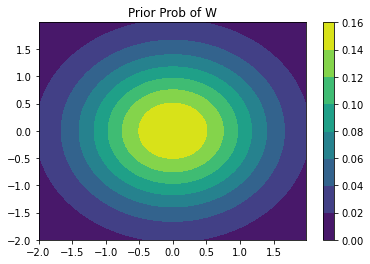

In [15]:
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((xx, yy))
plt.contourf(xx, yy, W_pri.pdf(pos))
plt.colorbar();
plt.title('Prior Prob of W')
plt.show()

# Calculating posterior 

$posterior = \frac{likelihood \; x \; prior}{marginal \: likelihood}$

$p (w|y,X) = \frac{p(y|X, w) \; p(w)}{p(y|X)} $

$p(w|y,X) = \sigma_{n}^{-2}(\sigma_{n}^{-2} XX^{T} + \Sigma^{-1}_{p})^{-1}Xy$

In [6]:
A = ((sig_n**-2)*X.T@X) + np.linalg.inv(W_pri_Cov)

In [7]:
# Posterior distribution of W 
W_pos_Cov = np.linalg.inv(A)
W_pos_mu = (sig_n**-2)*W_pos_Cov@X.T@y
W_pos = multivariate_normal(W_pos_mu.reshape(-1,), W_pos_Cov)

In [8]:
print('Estimated w')
W_pos_mu

Estimated w


array([[-0.72159368],
       [ 1.03867551]])

In [9]:
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((xx, yy))

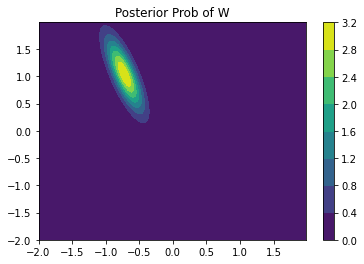

In [14]:
plt.contourf(xx, yy, W_pos.pdf(pos))
plt.colorbar();
plt.title('Posterior Prob of W')
plt.show()

In [11]:
y_pred_Cov = X_t @W_pos_Cov@X_t.T
y_pred_mu = (sig_n**-2)*X_t @W_pos_Cov@X.T@y

In [12]:
print('R2')
1 - (np.sum((y_t-y_pred_mu)**2)/np.sum(y_t**2))

R2


0.7462068579381047